# Семинар 1: знакомство с PyTorch

## Вступление

В этом семинаре мы познакомимся с библиотекой **PyTorch**. Он очень похож на **NumPy**, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) — **PyTorch** может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях.

### План семинара:

1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**
2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций
3. Работаем с градиентами руками
4. Моя первая нейросеть

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from sklearn.datasets import load_boston
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

### 1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [2]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.72371593, 0.50921163, 0.53207512],
       [0.59185616, 0.06783602, 0.79668999],
       [0.23071615, 0.85677191, 0.88322301],
       [0.00117589, 0.20947956, 0.10361602],
       [0.07037212, 0.39856408, 0.32074193]])

In [3]:
# размеры массива
a.shape

(5, 3)

In [4]:
# сложение
a + 5

array([[5.72371593, 5.50921163, 5.53207512],
       [5.59185616, 5.06783602, 5.79668999],
       [5.23071615, 5.85677191, 5.88322301],
       [5.00117589, 5.20947956, 5.10361602],
       [5.07037212, 5.39856408, 5.32074193]])

In [5]:
# матричное умножение
a @ a.T

array([[1.06616517, 0.88677754, 1.07319217, 0.16265195, 0.42454169],
       [0.88677754, 0.98961038, 0.8983257 , 0.09745607, 0.32421906],
       [1.07319217, 0.8983257 , 1.56737093, 0.27126356, 0.64100114],
       [0.16265195, 0.09745607, 0.27126356, 0.05461935, 0.11680778],
       [0.42454169, 0.32421906, 0.64100114, 0.11680778, 0.26668094]])

In [6]:
# среднее по колонкам
a.mean(axis=-1)

array([0.58833423, 0.48546072, 0.65690369, 0.10475716, 0.26322604])

In [7]:
# решейп
a.reshape(3, 5).shape

(3, 5)

#### Разминка

При помощи **NumPy** посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [8]:
# YOUR CODE

Аналогичные операции в **PyTorch** очень похожи, но иногда имеют немного другой синтаксис

In [9]:
# случайный тензор
x = torch.rand(5, 3)
x

tensor([[0.6434, 0.5560, 0.9995],
        [0.6742, 0.4094, 0.2381],
        [0.1748, 0.9996, 0.2559],
        [0.3835, 0.3061, 0.0520],
        [0.4834, 0.4109, 0.7033]])

In [10]:
# размеры тензора
x.shape

torch.Size([5, 3])

In [11]:
# тоже размеры тензора
x.size()

torch.Size([5, 3])

In [12]:
# сложение
x + 5

tensor([[5.6434, 5.5560, 5.9995],
        [5.6742, 5.4094, 5.2381],
        [5.1748, 5.9996, 5.2559],
        [5.3835, 5.3061, 5.0520],
        [5.4834, 5.4109, 5.7033]])

In [13]:
# матричное умножение
# читайте документации по различным вариантам: @, torch.mm, torch.matmul, torch.bmm
torch.matmul(x, x.transpose(1, 0))

tensor([[1.7220, 0.8994, 0.9240, 0.4689, 1.2423],
        [0.8994, 0.6789, 0.5880, 0.3963, 0.6616],
        [0.9240, 0.5880, 1.0952, 0.3863, 0.6752],
        [0.4689, 0.3963, 0.3863, 0.2435, 0.3477],
        [1.2423, 0.6616, 0.6752, 0.3477, 0.8971]])

In [14]:
# очередное матричное умножение
x.mm(x.t())

tensor([[1.7220, 0.8994, 0.9240, 0.4689, 1.2423],
        [0.8994, 0.6789, 0.5880, 0.3963, 0.6616],
        [0.9240, 0.5880, 1.0952, 0.3863, 0.6752],
        [0.4689, 0.3963, 0.3863, 0.2435, 0.3477],
        [1.2423, 0.6616, 0.6752, 0.3477, 0.8971]])

In [15]:
# поэлементное умножение
x * x

tensor([[0.4139, 0.3091, 0.9990],
        [0.4546, 0.1676, 0.0567],
        [0.0305, 0.9991, 0.0655],
        [0.1471, 0.0937, 0.0027],
        [0.2336, 0.1688, 0.4946]])

In [16]:
# среднее по колонкам
x.mean(dim=-1)

tensor([0.7329, 0.4406, 0.4768, 0.2472, 0.5325])

In [17]:
# решейп
x.view([3, 5]).shape

torch.Size([3, 5])

In [18]:
# или так
x.reshape([3, 5]).shape

torch.Size([3, 5])

In [19]:
# будьте внимательны и не используйте view для транспонирования осей!
x.view_as(x.t()) == x.t()

tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог **NumPy** операции в **PyTorch**


#### Разминка на pytorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [20]:
# YOUR CODE

### 2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций

In [21]:
# пустой тензор
x = torch.empty(5, 3)
x

tensor([[ 0.0000e+00,  8.5899e+09, -7.1972e-22],
        [-1.5849e+29,  4.0820e-01,  2.3811e-01],
        [ 1.7478e-01,  9.9955e-01,  2.5595e-01],
        [ 3.8351e-01,  3.0615e-01,  5.1960e-02],
        [ 4.8336e-01,  4.1085e-01,  7.0329e-01]])

In [22]:
# случайный тензор ~ Uniform[0, 1)
x = torch.rand(5, 3)
x

tensor([[0.4556, 0.1991, 0.6200],
        [0.8642, 0.7365, 0.0043],
        [0.7536, 0.5995, 0.1648],
        [0.1977, 0.4866, 0.6791],
        [0.6985, 0.7993, 0.4026]])

In [23]:
# тензор с нулями и указанием типов чисел
x = torch.zeros(5, 3, dtype=torch.float32)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [24]:
# конструируем тензор из питоновского листа
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [25]:
# используем уже созданный тензор для создания тензора из единичек
x1 = x.new_ones(5, 3, dtype=torch.double)
x1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [26]:
# создаем случайный тензор с размерами другого тензора
x = torch.randn_like(x1, dtype=torch.float)
x

tensor([[-0.7354, -0.6773, -0.6208],
        [ 1.0887, -0.6210, -0.2496],
        [-0.2903,  0.6845, -0.2467],
        [-0.5339,  1.0453,  0.7056],
        [ 1.1824, -0.7675,  0.6351]])

In [27]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [28]:
x

tensor([[0.3257, 0.4406, 0.9101],
        [0.1317, 0.3773, 0.5120],
        [0.2251, 0.0270, 0.8007],
        [0.8002, 0.0747, 0.5570],
        [0.4509, 0.8987, 0.3707]])

In [29]:
y

tensor([[0.1281, 0.8518, 0.0160],
        [0.1804, 0.8616, 0.3345],
        [0.2624, 0.2885, 0.5581],
        [0.2135, 0.8258, 0.0699],
        [0.5051, 0.4147, 0.5347]])

In [30]:
# сложение
x + y

tensor([[0.4538, 1.2924, 0.9262],
        [0.3121, 1.2389, 0.8465],
        [0.4875, 0.3155, 1.3587],
        [1.0137, 0.9005, 0.6269],
        [0.9560, 1.3134, 0.9055]])

In [31]:
# очередное сложение
z = torch.add(x, y)
z

tensor([[0.4538, 1.2924, 0.9262],
        [0.3121, 1.2389, 0.8465],
        [0.4875, 0.3155, 1.3587],
        [1.0137, 0.9005, 0.6269],
        [0.9560, 1.3134, 0.9055]])

In [32]:
# наконец, ещё одно сложение!
torch.add(x, y, out=x)
x

tensor([[0.4538, 1.2924, 0.9262],
        [0.3121, 1.2389, 0.8465],
        [0.4875, 0.3155, 1.3587],
        [1.0137, 0.9005, 0.6269],
        [0.9560, 1.3134, 0.9055]])

In [33]:
# добавили измерение в начало, аналог броадкастинга
x.unsqueeze(0).size()

torch.Size([1, 5, 3])

In [34]:
# убрали одно единичное измерение
x.unsqueeze(0).unsqueeze(1).squeeze(0).size()

torch.Size([1, 5, 3])

In [35]:
# убрали все единичные измерения
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [36]:
# операции без _ не меняют тензор, а создают копию
x.unsqueeze(0)
x.size()

torch.Size([5, 3])

In [37]:
# операции с _ меняют тензор
x.unsqueeze_(0)
x.size()

torch.Size([1, 5, 3])

Мы можем делать обычные срезы и переводить матрицы из **PyTorch** в **NumPy** и наоборот:

In [38]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
np.allclose(x.numpy(), a)

True

In [39]:
np.allclose(x.numpy()[:, 1], a[:, 1])

True

In [40]:
torch.from_numpy(x.numpy())

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

### 3. Работаем с градиентами руками

/usr/local/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

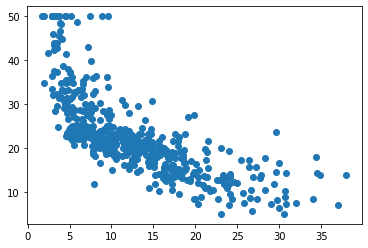

In [41]:
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target);

В **PyTorch** есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

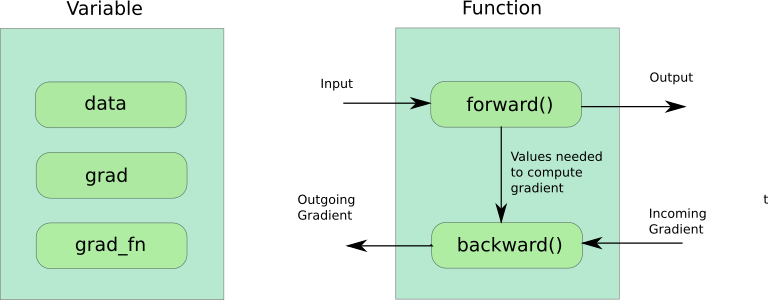

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенты для всех тензоров, у которых `requires_grad=True`.

In [42]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [43]:
x.size(), y.size()

(torch.Size([506]), torch.Size([506]))

In [44]:
y_pred = w * x + b
loss = torch.mean((y_pred - y) ** 2)
loss.backward()

In [45]:
# сделали операции и посчитали градиенты, появилось значение соответствующих полей
assert w.grad is not None
assert b.grad is not None

print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")

dL/dw = tensor([-12.2880])
dL/db = tensor([-44.5911])


Для доступа к значениям в тензоре используйте атрибут `.data`:

In [46]:
w.data, w.grad

(tensor([0.3491]), tensor([-12.2880]))

In [47]:
w

tensor([0.3491], requires_grad=True)

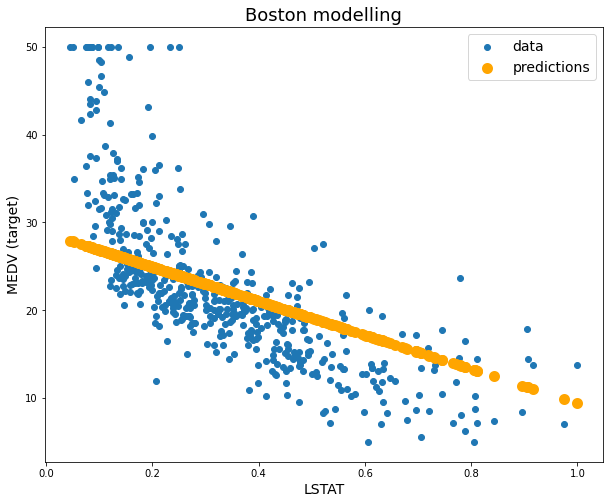

loss =  48.32032


In [48]:
from IPython.display import clear_output

for i in range(300):
    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad
    b.data -= 0.05 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10, 8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(
            x.data.numpy(),
            y_pred.data.numpy(),
            color="orange",
            linewidth=5,
            label="predictions",
        )
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break

### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросети в **PyTorch**, нужно освоить три вещи:

1. Как формировать батчи и подавать их на вход сети
2. Как задать архитектуру сети
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы иметь возможность итерироваться по данным и применять к ним преобразования (например, аугментации, о которых вы узнаете позже), нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

У такого класса **должно быть** три метода:

* `__init__` — создаёт поля класса (например, путь к папке с файлами с тренировочными объектами)
* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — по индексу возвращает семпл и таргет к нему


Давайте напишем такой сами, в качестве данных используя рандомные значения.

In [49]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {
            "sample": torch.tensor(self.x[idx, :], dtype=torch.float),
            "target": self.y[idx],
        }

In [50]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [51]:
our_dataset = RandomDataset(x, y)

In [52]:
our_dataset.__getitem__(1)

{'sample': tensor([0.6788, 0.3202, 0.6422, 0.3080, 0.7729]),
 'target': 0.4025345222297003}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [53]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [54]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.0593, 0.7277, 0.2200, 0.9378, 0.3835],
        [0.6788, 0.3202, 0.6422, 0.3080, 0.7729],
        [0.6843, 0.6699, 0.5373, 0.3875, 0.3223],
        [0.0510, 0.1467, 0.0690, 0.4167, 0.4942]])
Target:
tensor([0.5249, 0.4025, 0.5927, 0.8436], dtype=torch.float64)


#### Как сделать нейросеть

Для того, чтобы в high-level **PyTorch** создавать нейросети, используется модуль `torch.nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [55]:
model = nn.Sequential()  # создаем пустую модель, в которую будем добавлять слои
model.add_module(
    "l1", nn.Linear(5, 30)
)  # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module("l2", nn.ReLU())  # добавили функцию активации
model.add_module(
    "l3", nn.Linear(30, 1)
)  # добавили слой с 3-мя нейронами на вход и 5-ю на выход

# альтернативный способ
another_model = nn.Sequential(nn.Linear(5, 30), nn.ReLU(), nn.Linear(30, 1))

In [56]:
y_pred = model(batch["sample"])  # получили предсказания модели

#### Как написать цикл обучения и отслеживать метрики
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [57]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/", train=False, download=True, transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=False, num_workers=1
)

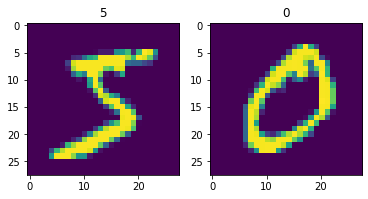

In [58]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [59]:
model = nn.Sequential(
    nn.Flatten(),  # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(
        28 * 28, 128
    ),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),  # нелинейность
    nn.Linear(
        128, 10
    ),  # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

Веса моделей хранятся в виде матриц и выглядят так:

In [60]:
[x for x in model.named_parameters()]

[('1.weight',
  Parameter containing:
  tensor([[ 0.0098, -0.0059,  0.0073,  ...,  0.0356, -0.0096,  0.0089],
          [-0.0260, -0.0141, -0.0281,  ..., -0.0111, -0.0181,  0.0221],
          [-0.0090, -0.0032, -0.0167,  ..., -0.0155,  0.0014,  0.0137],
          ...,
          [ 0.0338,  0.0097,  0.0166,  ..., -0.0173,  0.0055, -0.0181],
          [-0.0143,  0.0210,  0.0042,  ...,  0.0206,  0.0198,  0.0019],
          [ 0.0291,  0.0225, -0.0251,  ...,  0.0115,  0.0263,  0.0131]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-0.0308, -0.0211,  0.0159,  0.0013, -0.0124, -0.0117, -0.0165,  0.0140,
          -0.0010, -0.0030, -0.0051, -0.0012,  0.0166, -0.0184, -0.0004,  0.0259,
          -0.0043, -0.0088, -0.0114, -0.0216,  0.0213,  0.0100,  0.0208, -0.0320,
           0.0276, -0.0063, -0.0347, -0.0124,  0.0073,  0.0230,  0.0128,  0.0147,
           0.0095, -0.0347, -0.0061, -0.0192,  0.0039, -0.0326, -0.0255, -0.0038,
           0.0342, -0.0145, -0.0288, 

Вместо того, чтобы каждый раз самим рисовать графики в `matplotlib`, мы будем _красиво_ трекать метрики в полуавтоматическом режиме в [wandb](https://wandb.ai). Для этого регистрируемся на сайте, устанавливаем и логинимся (это того стоит).

Note. Помимо этого инструмента есть другие альтернативы: Tensorboard (очень минималистичный, работает локально), MLFlow (менее красивый, но опенсорсный), Neptune (примерно как W&B).

In [ ]:
# !pip install wandb --upgrade --quiet
import wandb

# логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
wandb.login()
# инициализируем проект
wandb.init(project="pytorch-demo")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model);

Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

In [62]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):  # берем батч из трейн лоадера
        y_pred = model(x_train)  # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train)  # считаем лосс
        loss.backward()  # считаем градиенты обратным проходом
        optimizer.step()  # обновляем параметры сети
        optimizer.zero_grad()  # обнуляем посчитанные градиенты параметров

    if epoch % 2 == 0:
        val_loss = []  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():  # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(
                val_dataloader
            ):  # берем батч из валидационного лоадера
                y_pred = model(x_val)  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val)  # считаем лосс
                val_loss.append(loss.numpy())  # добавляем в массив
                val_accuracy.extend(
                    (torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist()
                )

        # скидываем метрики на wandb и автоматом смотрим на графики
        wandb.log(
            {
                "mean val loss": np.mean(val_loss),
                "mean val accuracy": np.mean(val_accuracy),
            }
        )

        # печатаем метрики
        print(
            f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}"
        )

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.10789481550455093, accuracy: 0.9673


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.08681301027536392, accuracy: 0.9744


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.08897168189287186, accuracy: 0.9734


### Дополнительные материалы:

* [Хорошая книга про pytorch](https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)